## Expoloary Data Analysis

In [2]:
## importing basic liabry

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("credit_data.csv")
df.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


### 2. Basic Information

In [4]:
### 2.1 top 5 info

In [5]:
df.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


In [6]:
### 2.1 bottom 5 record

In [7]:
df.tail()

,clientid,income,age,loan,default
1995,1996,59221.04487,48.518179,1926.729397,0
1996,1997,69516.12757,23.162104,3503.176156,0
1997,1998,44311.44926,28.017167,5522.786693,1
1998,1999,43756.05660,63.971796,1622.722598,0
1999,2000,69436.57955,56.152617,7378.833599,0


In [8]:
### 2.3 shape of dataset

In [9]:
df.shape

(2000, 5)

In [10]:
#### there are 2000 row and 5 columns

In [11]:
### 2.4 data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [13]:
#### data information there 5 numerical features

In [14]:
### 2.5 checking duplicate values

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
#### there are not any duplicate values

In [17]:
### 2.6 checking null value

In [18]:
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [19]:
## there 3 null values is indicating in age features

## 3. Descriptive Statistics

In [20]:
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459720,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117310,41.317159,3974.719418,0.000000
75%,1500.250000,57791.281670,52.587040,6432.410625,0.000000
max,2000.000000,69995.685580,63.971796,13766.051240,1.000000


- as per data inforamation, there mean of income is 45331 and age is 40, loan amount 4444 and default 0.14
- the minimum income is 20014 and the maximum is 69995 and std 14326
- as per data information minimum is age is indicating -52 and maximum is 63
- the minimum loan amount is 1.37 and maximum is 13766 


In [21]:
df['default'].value_counts()

default
0    1717
1     283
Name: count, dtype: int64

In [23]:
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [26]:
## filling the missing values

In [27]:
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\ThinkPad-T570Worksta\AppData\Local\Temp\ipykernel_18844\1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [30]:
df.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [31]:
## split the data into independent and dependent feature

In [32]:
X=df.drop(['default','clientid'],axis=True)
y = df['default']
X.shape, y.shape

((2000, 3), (2000,))

In [33]:
## split the data into train test split

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,  stratify=y)
X_train.shape, X_test.shape

((1600, 3), (400, 3))

In [38]:
y_train.shape, y_test.shape

((1600,), (400,))

In [40]:
## Handle imbalance ONLY on training data: SMOTE (Oversampling)

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res =smote.fit_resample(X_train, y_train)
X_train_res.shape, y_train_res.shape

((2748, 3), (2748,))

In [43]:
# Count of each class
print(y_train_res.value_counts())

# Percentage
print(y_train_res.value_counts(normalize=True) * 100)

default
0    1374
1    1374
Name: count, dtype: int64
default
0    50.0
1    50.0
Name: proportion, dtype: float64


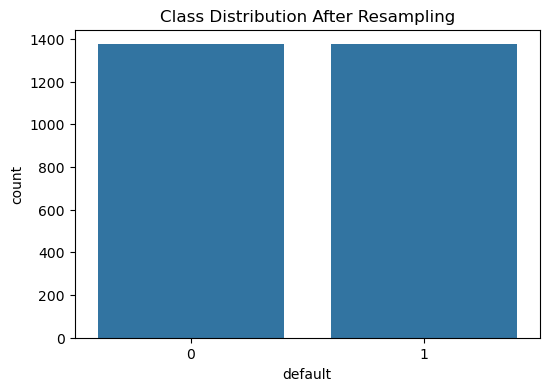

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res)
plt.title("Class Distribution After Resampling")
plt.show()


In [46]:
print("Class counts after resampling:")
print(y_train_res.value_counts())


Class counts after resampling:
default
0    1374
1    1374
Name: count, dtype: int64


In [49]:
## applying tranformation , which IS three types

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [55]:
numerical_features = ['income','age','loan']

In [56]:
numerical_features

['income', 'age', 'loan']

In [57]:
num_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)


preprocessor = ColumnTransformer(
    [
        ("num",num_pipeline,numerical_features)
    ]
)

In [59]:
X_train_trans=preprocessor.fit_transform(X_train_res)
X_test_trans = preprocessor.transform(X_test)

In [60]:
X_test_trans

array([[ 1.52899275e+00, -7.40888712e-01,  1.28641158e+00],
       [-1.63253672e+00,  1.26774067e+00, -1.53649258e+00],
       [ 1.14499463e+00, -1.07966896e+00,  4.54173759e-04],
       ...,
       [ 1.96251794e-01,  2.07438725e+00,  8.83215977e-02],
       [-2.47102848e-01, -1.20377753e+00, -1.30286754e+00],
       [-8.81606800e-01, -1.04064335e+00,  8.32227799e-02]])

In [61]:
X_train_trans

array([[ 0.64164886,  1.93361295,  0.39455573],
       [-0.29412903,  1.4270625 , -1.72739695],
       [-0.21380368,  0.34312869,  0.13805876],
       ...,
       [-0.5122956 , -1.05459683, -0.03918412],
       [ 0.92907803, -0.37384325,  1.13880609],
       [-1.08071013, -0.43970477, -0.42094137]])

In [62]:
## importig libary for model training

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,classification_report

In [68]:
models = {
    "logisticRegressor":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomforestClassifier":RandomForestClassifier(),
    "GradientDecentRegressor":GradientBoostingClassifier(),
    "AdaboostingClassifier":AdaBoostClassifier(),
    "XGBoostingClassier":XGBClassifier(),
    "CatboostingClassifier":CatBoostClassifier(),
    "SupportVectorClassifier":SVC()
}

In [97]:
model_list = []
r2_test_score = []

for model_name, model in models.items():
    model.fit(X_train_trans,y_train_res)
    ## prediction with training and testing dataset
    y_train_pred = model.predict(X_train_trans)
    y_test_pred = model.predict(X_test_trans)

    ## evaluate the model with training and testing dataset

    x_train_r2 = r2_score(y_train_res,y_train_pred)
    x_train_mse = mean_squared_error(y_train_res,y_train_pred)
    x_train_mae = mean_absolute_error(y_train_res,y_train_pred)
    x_train_rmse = np.sqrt(mean_squared_error(y_train_res,y_train_pred))

    # evaluate the model with training and testing dataset
    x_test_r2 = r2_score(y_test,y_test_pred)
    x_test_mse = mean_squared_error(y_test,y_test_pred)
    x_test_mae = mean_absolute_error(y_test,y_test_pred)
    x_test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))

    ## store the model
    model_list.append((model_name,model))
    r2_test_score.append((model_name,r2_test_score))

     # print results cleanly
    print(f"Model: {model_name}")
    print(f" Train R2: {x_train_r2:.4f}, Test R2: {x_test_r2:.4f}")
    print(f" Train RMSE: {x_train_rmse:.4f}, Test RMSE: {x_test_rmse:.4f}")
    print(f" Train MSE: {x_train_mse:.4f}, Test R2: {x_test_mse:.4f}")
    print(f" Train MAE: {x_train_mae:.4f}, Test RMSE: {x_test_mae:.4f}")
    print("-" * 40)
            
       

Model: logisticRegressor
 Train R2: 0.7904, Test R2: 0.5090
 Train RMSE: 0.2289, Test RMSE: 0.2449
 Train MSE: 0.0524, Test R2: 0.0600
 Train MAE: 0.0524, Test RMSE: 0.0600
----------------------------------------
Model: DecisionTreeClassifier
 Train R2: 1.0000, Test R2: 0.8568
 Train RMSE: 0.0000, Test RMSE: 0.1323
 Train MSE: 0.0000, Test R2: 0.0175
 Train MAE: 0.0000, Test RMSE: 0.0175
----------------------------------------
Model: RandomforestClassifier
 Train R2: 1.0000, Test R2: 0.8568
 Train RMSE: 0.0000, Test RMSE: 0.1323
 Train MSE: 0.0000, Test R2: 0.0175
 Train MAE: 0.0000, Test RMSE: 0.0175
----------------------------------------
Model: GradientDecentRegressor
 Train R2: 0.9956, Test R2: 0.8363
 Train RMSE: 0.0330, Test RMSE: 0.1414
 Train MSE: 0.0011, Test R2: 0.0200
 Train MAE: 0.0011, Test RMSE: 0.0200
----------------------------------------
Model: AdaboostingClassifier
 Train R2: 0.9345, Test R2: 0.7340
 Train RMSE: 0.1280, Test RMSE: 0.1803
 Train MSE: 0.0164, Test 

In [98]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000, C=0.1)  # example
scores = cross_val_score(model, X_train_trans, y_train_res, cv=5, scoring='r2')
print("CV R2:", scores.mean(), scores)


CV R2: 0.7947657597876576 [0.81818182 0.76       0.78909091 0.82513603 0.78142004]


In [121]:
model = RandomForestClassifier(max_depth=25, n_estimators=100, min_samples_leaf=10)
model.fit(X_train_trans,y_train_res)
y_train_pred = model.predict(X_train_trans)
y_test_pred = model.predict(X_test_trans)

y_train_r2score = r2_score(y_train_res,y_train_pred)
y_test_r2score = r2_score(y_test,y_test_pred)

print(y_train_r2score)
print(y_test_r2score)

0.9650655021834061
0.7954068845583346


In [122]:
print(X_train_trans.mean(axis=0))
print(X_test_trans.mean(axis=0))

[ 1.21526596e-16 -4.13707561e-17 -8.27415122e-17]
[-0.0664843   0.44477796 -0.39417851]


In [123]:
print("Train means:", X_train_trans.mean(axis=0))
print("Test means: ", X_test_trans.mean(axis=0))


Train means: [ 1.21526596e-16 -4.13707561e-17 -8.27415122e-17]
Test means:  [-0.0664843   0.44477796 -0.39417851]


In [112]:
[model_xg = XGBClassifier(max_depth=3, learning_rate=0.05, n_estimators=300,
                      subsample=0.8, colsample_bytree=0.8)
model_xg.fit(X_train_trans,y_train_res)
xg_train_pred = model.predict(X_train_trans)
xg_test_pred = model.predict(X_test_trans)

xg_train_r2score = r2_score(y_train_res,xg_train_pred)
xg_test_r2score = r2_score(y_test,xg_test_pred)

print(xg_train_r2score)
print(xg_test_r2score)


0.8384279475982532
0.3657613421308372


In [124]:
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    accuracy_score
)
import pandas as pd

results = []

for model_name, model in models.items():
    # 1) train the model (if not already trained)
    model.fit(X_train_trans, y_train_res)

    # 2) predictions on test
    y_test_pred = model.predict(X_test_trans)

    # 3) ROC-AUC if possible
    if hasattr(model, "predict_proba"):
        # most tree ensembles, logistic, etc., have predict_proba
        y_test_proba = model.predict_proba(X_test_trans)[:, 1]
        roc = roc_auc_score(y_test, y_test_proba)
    else:
        # e.g., default SVC without probability=True
        roc = None

    # 4) other useful metrics
    prec = precision_score(y_test, y_test_pred)
    rec  = recall_score(y_test, y_test_pred)
    f1   = f1_score(y_test, y_test_pred)
    acc  = accuracy_score(y_test, y_test_pred)

    # optional: confusion matrix if you want to inspect
    cm = confusion_matrix(y_test, y_test_pred)

    # 5) collect results
    results.append({
        "model": model_name,
        "roc_auc": roc,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": cm
    })

# 6) display summary sorted by best ROC-AUC (or change to F1 etc.)
results_df = pd.DataFrame(results)

# sort by roc_auc, putting None last
results_df = results_df.sort_values(
    by="roc_auc",
    ascending=False,
    na_position="last"
).reset_index(drop=True)

print(results_df.drop(columns=["confusion_matrix"]))  # show metrics table

# If you want to see confusion matrix for each model, do:
# for row in results_df.itertuples():
#     print(row.model)
#     print(row.confusion_matrix)
#     print("-" * 30)


Learning rate set to 0.015863
0:	learn: 0.6632973	total: 4.15ms	remaining: 4.14s
1:	learn: 0.6355264	total: 7.83ms	remaining: 3.91s
2:	learn: 0.6080418	total: 11.7ms	remaining: 3.9s
3:	learn: 0.5842060	total: 15.2ms	remaining: 3.8s
4:	learn: 0.5596512	total: 19.4ms	remaining: 3.86s
5:	learn: 0.5333347	total: 22.8ms	remaining: 3.78s
6:	learn: 0.5075476	total: 26.4ms	remaining: 3.74s
7:	learn: 0.4869535	total: 29.9ms	remaining: 3.71s
8:	learn: 0.4647641	total: 33.5ms	remaining: 3.69s
9:	learn: 0.4439862	total: 37ms	remaining: 3.66s
10:	learn: 0.4255190	total: 40.5ms	remaining: 3.64s
11:	learn: 0.4094327	total: 44.1ms	remaining: 3.63s
12:	learn: 0.3925054	total: 47.6ms	remaining: 3.61s
13:	learn: 0.3787056	total: 51.7ms	remaining: 3.64s
14:	learn: 0.3646417	total: 55.5ms	remaining: 3.64s
15:	learn: 0.3489971	total: 59.6ms	remaining: 3.66s
16:	learn: 0.3360665	total: 63.2ms	remaining: 3.66s
17:	learn: 0.3271503	total: 67.5ms	remaining: 3.68s
18:	learn: 0.3165722	total: 71.3ms	remaining: 3.